Hind Ali  

Import the Data set (Email spam classification)

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Email spam classification.xlsx')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Since v1 is categorical variable we want to convert to numerical variables for use in machine learning algorithms. Therefore, we replacing the string values 'spam' with 1 and the string values 'ham' with 0.

In [6]:
df['v1'] = df['v1'].map({'spam':1, 'ham':0})
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Import neccesary Libraries 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Convert all elements in X_test to strings
X_test = [str(x) for x in X_test]

# Create a TfidfVectorizer to transform text data into numerical features
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
#SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [10]:
# Evaluate the performance of the SVM model
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,2))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('SVM Precision:', round(precision_score(y_test, y_pred)*100,2))
print('SVM Recall:', round(recall_score(y_test, y_pred)*100,2))
print('SVM F1 score:', round(f1_score(y_test, y_pred)*100,2))

Accuracy: 98.3
Confusion Matrix: [[963   2]
 [ 17 133]]
SVM Precision: 98.52
SVM Recall: 88.67
SVM F1 score: 93.33


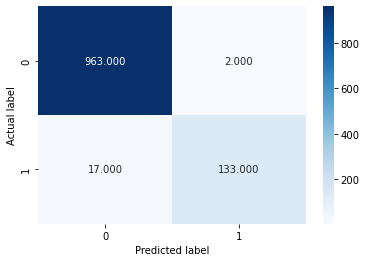

In [11]:
# SVM model Heat Map
svm_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt=".3f")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

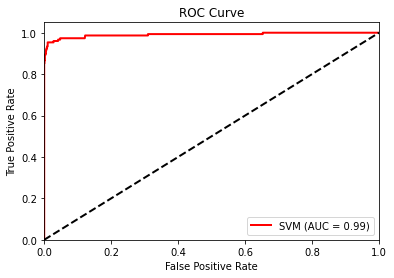

In [12]:
#predicted probabilities SVM model
svm_prob = model.predict_proba(X_test)[:, 1]

#false positive rate, true positive rate, and AUC
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_prob)
svm_roc_auc = auc(svm_fpr, svm_tpr)

#ROC curve
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label='SVM (AUC = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


The AUC for SVM model is 0.99. Demostrating that the model has a very good ability to distinguish between positive and negative samples. The AUC ranges from 0 to 1, where 0.5 means that the model is randomly guessing and 1 means that the model perfectly separates the positive and negative samples. Therefore, an AUC of 0.99 indicates that the model has an excellent performance in terms of classification.

The plot the ROC curve for the SVM model, shows a very high true positive rate for a low false positive rate, which is a desirable characteristic for a binary classification model.

Explanation of the model performance

Accuracy: The model achieved an accuracy of 0.98, which means that it correctly predicted 98.3% of the emails.

Confusion matrix: The confusion matrix shows that the model correctly predicted 963 emails as ham and 133 emails as spam, but misclassified 2 ham emails as spam and 17 spam emails as ham.

Precision: The precision of the model is 0.98, which means that out of all the emails predicted as spam, 98.5% were actually spam.

Recall: The recall of the model is 0.88, which means that out of all the spam emails, the model correctly identified 88.7%.

F1 score: The model is 0.93, which is a good indication that the model performs well on both precision and recall.

Overall, these metrics suggest that the SVM model performs well in making correct predictions and is effective in distinguishing between spam and ham emails.

In [13]:
#Logistic regression model
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

y_pred1 = lr_clf.predict(X_test)

In [14]:
# Evaluate the performance of the Logistic Regression model
print('Logistic Regression Accuracy:', round(accuracy_score(y_test, y_pred1)*100,2))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred1))
print('Logistic Regression Precision:', round(precision_score(y_test, y_pred1)*100,2))
print('Logistic Regression Recall:', round(recall_score(y_test, y_pred1)*100,2))
print('Logistic Regression F1 score:', round(f1_score(y_test, y_pred1)*100,2))

Logistic Regression Accuracy: 96.59
Confusion Matrix: [[964   1]
 [ 37 113]]
Logistic Regression Precision: 99.12
Logistic Regression Recall: 75.33
Logistic Regression F1 score: 85.61


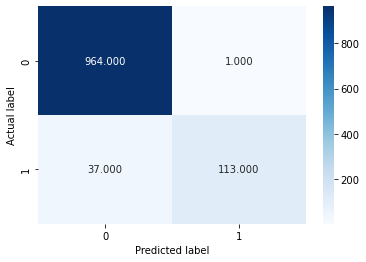

In [15]:
# Logistic Regression model Heat Map
lr_cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt=".3f")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

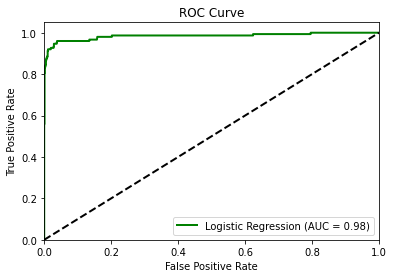

In [16]:
#predicted probabilities Logistic Regression model
lr_prob = lr_clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, lr_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


AUC is 0.98 for the Logistic Regression Model. This means that the model is able to correctly classify the majority of positive examples and has a low rate of falsely classifying negative examples as positive.

The accuracy of the model is 0.9659 or 96.59%, meaning that the model was able to classify the majority of the observations correctly.

The confusion matrix predicted 964 true positives and 113 true negatives. It incorrectly predicted 1(spam as a ham) false positive and 37 (ham as spam) false negatives.

Precision is 0.9912 or 99.12%, indicating that when the model predicted a positive label, it was very likely to be correct.

Recall is 0.7533 or 75.33%, indicating that the model correctly identified only 75.33% of the positive observations.

The F1 score is 0.8560 or 85.60%, indicating that the model performs well overall but may not be optimal for all use cases.

In [17]:
#Naive Bayes model
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)


y_pred2 = model_NB.predict(X_test)

In [18]:
# Evaluate the performance of the Naive Bayes model
print('Accuracy:', round(accuracy_score(y_test, y_pred2)*100,2))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred2))
print('NB Precision:', round(precision_score(y_test, y_pred2)*100,2))
print('NB Recall:', round(recall_score(y_test, y_pred2)*100,2))
print('NB F1 score:', round(f1_score(y_test, y_pred2)*100,2))

Accuracy: 96.23
Confusion Matrix: [[965   0]
 [ 42 108]]
NB Precision: 100.0
NB Recall: 72.0
NB F1 score: 83.72


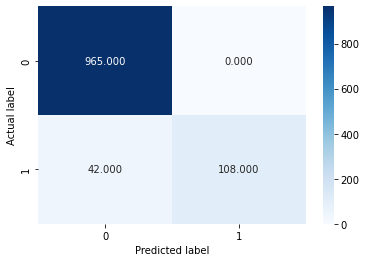

In [19]:
# Naive Bayes model Heat Map 
nb_cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(nb_cm, annot=True, cmap='Blues', fmt=".3f")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

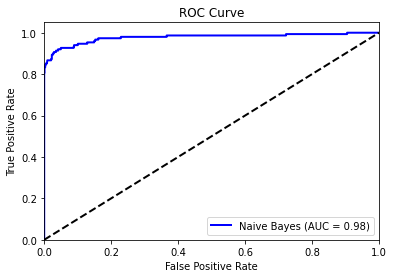

In [20]:
#predicted probabilities Naive Bayes model
nb_prob = model_NB.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, nb_prob[:, 1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The accuracy score is 96.23%, which means that 96.23% of the test instances were correctly classified by the model.

The confusion matrix shows that there were 965 true negatives (instances that were actually negative and predicted as negative) and 108 true positives (instances that were actually positive and predicted as positive). There were also 0 false positives (instances that were actually negative but predicted as positive) and 42 false negatives (instances that were actually positive but predicted as negative).

Precision score is 100%, which means that all the positive predictions made by the NB model were correct. 

Recall score is 72%, which means that the model correctly identified 72% of the actual positive instances. 

F1 score is a weighted harmonic mean of precision and recall, and it is 83.72% in this case.

Overall, the NB model performed very well on the test set, achieving a high accuracy and precision score. However, the recall score is relatively low, indicating that the model may have missed some positive instances.

##### Concluding on the models prediction based on metrics result

Based on result from the metrics, the SVM model seems to be the best model for the classification of spam emails. The SVM model has the highest accuracy of 98.3%, which means it correctly classified 98.3% of the emails as spam or not spam.

Moreover, when looking at the confusion matrix, the SVM model has only 2 misclassifications out of 1115 total test cases, which is very low. It correctly classified 963 non-spam emails and 133 spam emails, with only 2 non-spam emails being classified as spam and 17 spam emails being classified as non-spam.

Looking at precision, recall, and F1 score, the SVM model also outperforms the other two models. It has the highest precision of 98.52%, which means that out of all the emails classified as spam by the model, 98.52% of them were actually spam. It also has the highest recall of 88.67%, which means that out of all the actual spam emails, the model correctly identified 88.67% of them as spam. Finally, it has the highest F1 score of 93.33%, which is a harmonic mean of precision and recall.

In comparison, the Logistic Regression model has a lower accuracy of 96.59%, with 38 misclassifications, and a lower recall of 75.33%, meaning it identified fewer actual spam emails as spam. The Naive Bayes model also has a lower accuracy of 96.23% and a lower recall of 72.0%.

Therefore, based on these metrics, we can conclude that the SVM model performs the best for the classification of spam emails.

#### Evaluating the three Models(Cross Validation)

In [21]:
X = df["v2"]
y = df["v1"]

X = [str(x) for x in X]
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Convert text data to numerical vectors
X = vectorizer.fit_transform(X)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [22]:
svm_accuracy = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
svm_precision = cross_val_score(model, X, y, cv=kfold, scoring="precision")
svm_recall = cross_val_score(model, X, y, cv=kfold, scoring="recall")
svm_f1 = cross_val_score(model, X, y, cv=kfold, scoring="f1")

In [23]:
lr_accuracy = cross_val_score(lr_clf, X, y, cv=kfold, scoring="accuracy")
lr_precision = cross_val_score(lr_clf, X, y, cv=kfold, scoring="precision")
lr_recall = cross_val_score(lr_clf, X, y, cv=kfold, scoring="recall")
lr_f1 = cross_val_score(lr_clf, X, y, cv=kfold, scoring="f1")

In [24]:
nb_accuracy = cross_val_score(model_NB, X, y, cv=kfold, scoring="accuracy")
nb_precision = cross_val_score(model_NB, X, y, cv=kfold, scoring="precision")
nb_recall = cross_val_score(model_NB, X, y, cv=kfold, scoring="recall")
nb_f1 = cross_val_score(model_NB, X, y, cv=kfold, scoring="f1")

In [25]:
print("SVM Accuracy:", round(svm_accuracy.mean()*100,2))
print("SVM Precision:", round(svm_precision.mean()*100,2))
print("SVM Recall:", round(svm_recall.mean()*100,2))
print("SVM F1 score:", round(svm_f1.mean()*100,2))

print("Logistic Regression Accuracy:", round(lr_accuracy.mean()*100,2))
print("Logistic Regression Precision:", round(lr_precision.mean()*100,2))
print("Logistic Regression Recall:", round(lr_recall.mean()*100,2))
print("Logistic Regression F1 score:", round(lr_f1.mean()*100,2))

print("Naive Bayes Accuracy:", round(nb_accuracy.mean()*100,2))
print("Naive Bayes Precision:", round(nb_precision.mean()*100,2))
print("Naive Bayes Recall:", round(nb_recall.mean()*100,2))
print("Naive Bayes F1 score:", round(nb_f1.mean()*100,2))

SVM Accuracy: 98.33
SVM Precision: 98.42
SVM Recall: 88.97
SVM F1 score: 93.4
Logistic Regression Accuracy: 98.31
Logistic Regression Precision: 98.81
Logistic Regression Recall: 88.59
Logistic Regression F1 score: 93.35
Naive Bayes Accuracy: 98.12
Naive Bayes Precision: 91.7
Naive Bayes Recall: 94.59
Naive Bayes F1 score: 93.06


The results obtained through cross-validation show that all three models have high accuracy in predicting whether an email is spam or not.

The SVM and logistic regression models have similar accuracy, precision, and F1 scores, with SVM having slightly better recall than logistic regression. This means that SVM is better at identifying actual spam emails, while logistic regression is better at avoiding false positives.

The Naive Bayes model has slightly lower accuracy, precision, and F1 score than SVM and logistic regression, but it has the highest recall. This means that Naive Bayes is good at identifying actual spam emails, but it may also classify some non-spam emails as spam.

Overall, all three models have high performance in predicting spam emails, but their performance varies in terms of precision, recall, and F1 score, which depend on the specific business needs and priorities.